In [ ]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("student_performance.csv")
df.head()

,StudyHours,ExtraParticipation,PreviousMarks,PapersPracticed,Participation,SleepingHours,PerformanceIndex
0,4.844284,11.419559,70.018673,1.620153,30.731811,49.274076,75.898507
1,6.793562,14.313434,55.907417,2.465882,49.932427,46.820946,71.940016
2,5.271577,9.620268,70.246238,1.466921,51.420476,58.815183,79.925692
3,2.864380,6.778645,86.991131,0.561105,6.009464,53.793819,80.837469
4,3.834094,6.806609,64.151062,2.279877,15.012837,55.163922,67.093330


- Mostrar cuántas filas y columnas tiene.
- Verificar si hay valores nulos.
- Identificar qué tipo de datos hay en cada columna.

In [ ]:
-# M-ostrar cuántas filas y columnas tiene
print("Filas y columnas:", df.shape)

# Verificar si hay valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Identificar qué tipo de datos hay en cada columna
print("Tipos de datos:\n", df.dtypes)

Filas y columnas: (1000, 7)
Valores nulos por columna:
 StudyHours            0
ExtraParticipation    0
PreviousMarks         0
PapersPracticed       0
Participation         0
SleepingHours         0
PerformanceIndex      0
dtype: int64
Tipos de datos:
 StudyHours            float64
ExtraParticipation    float64
PreviousMarks         float64
PapersPracticed       float64
Participation         float64
SleepingHours         float64
PerformanceIndex      float64
dtype: object


- Graficar histogramas de algunas variables y observar cómo se relacionan con Performance index.

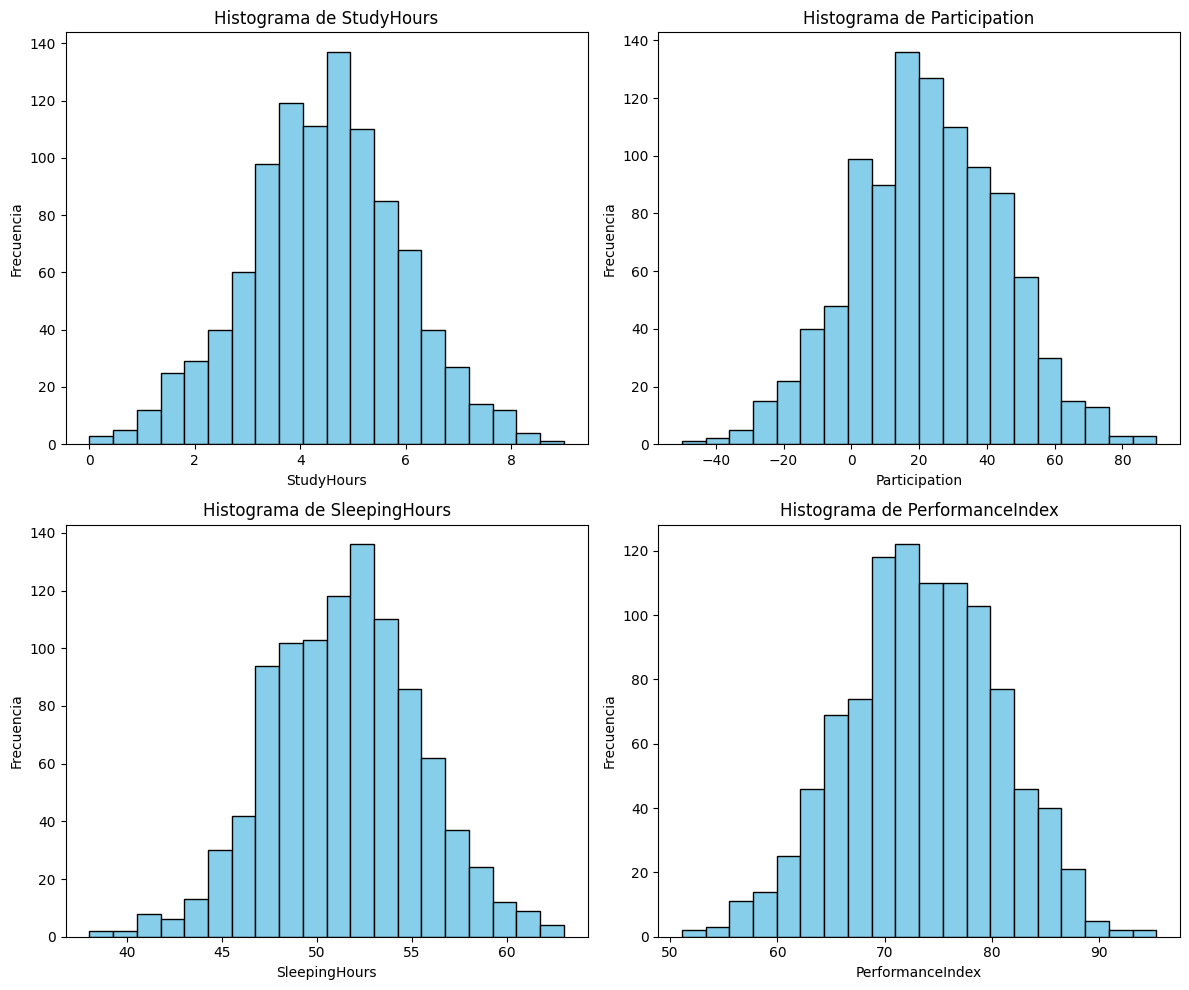

In [ ]:
plt.figure(figsize=(12, 10))


variables = ["StudyHours", "Participation", "SleepingHours", "PerformanceIndex"]

for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i) 
    plt.hist(df[var], bins=20, edgecolor='black', color='skyblue')
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout() 
plt.show()

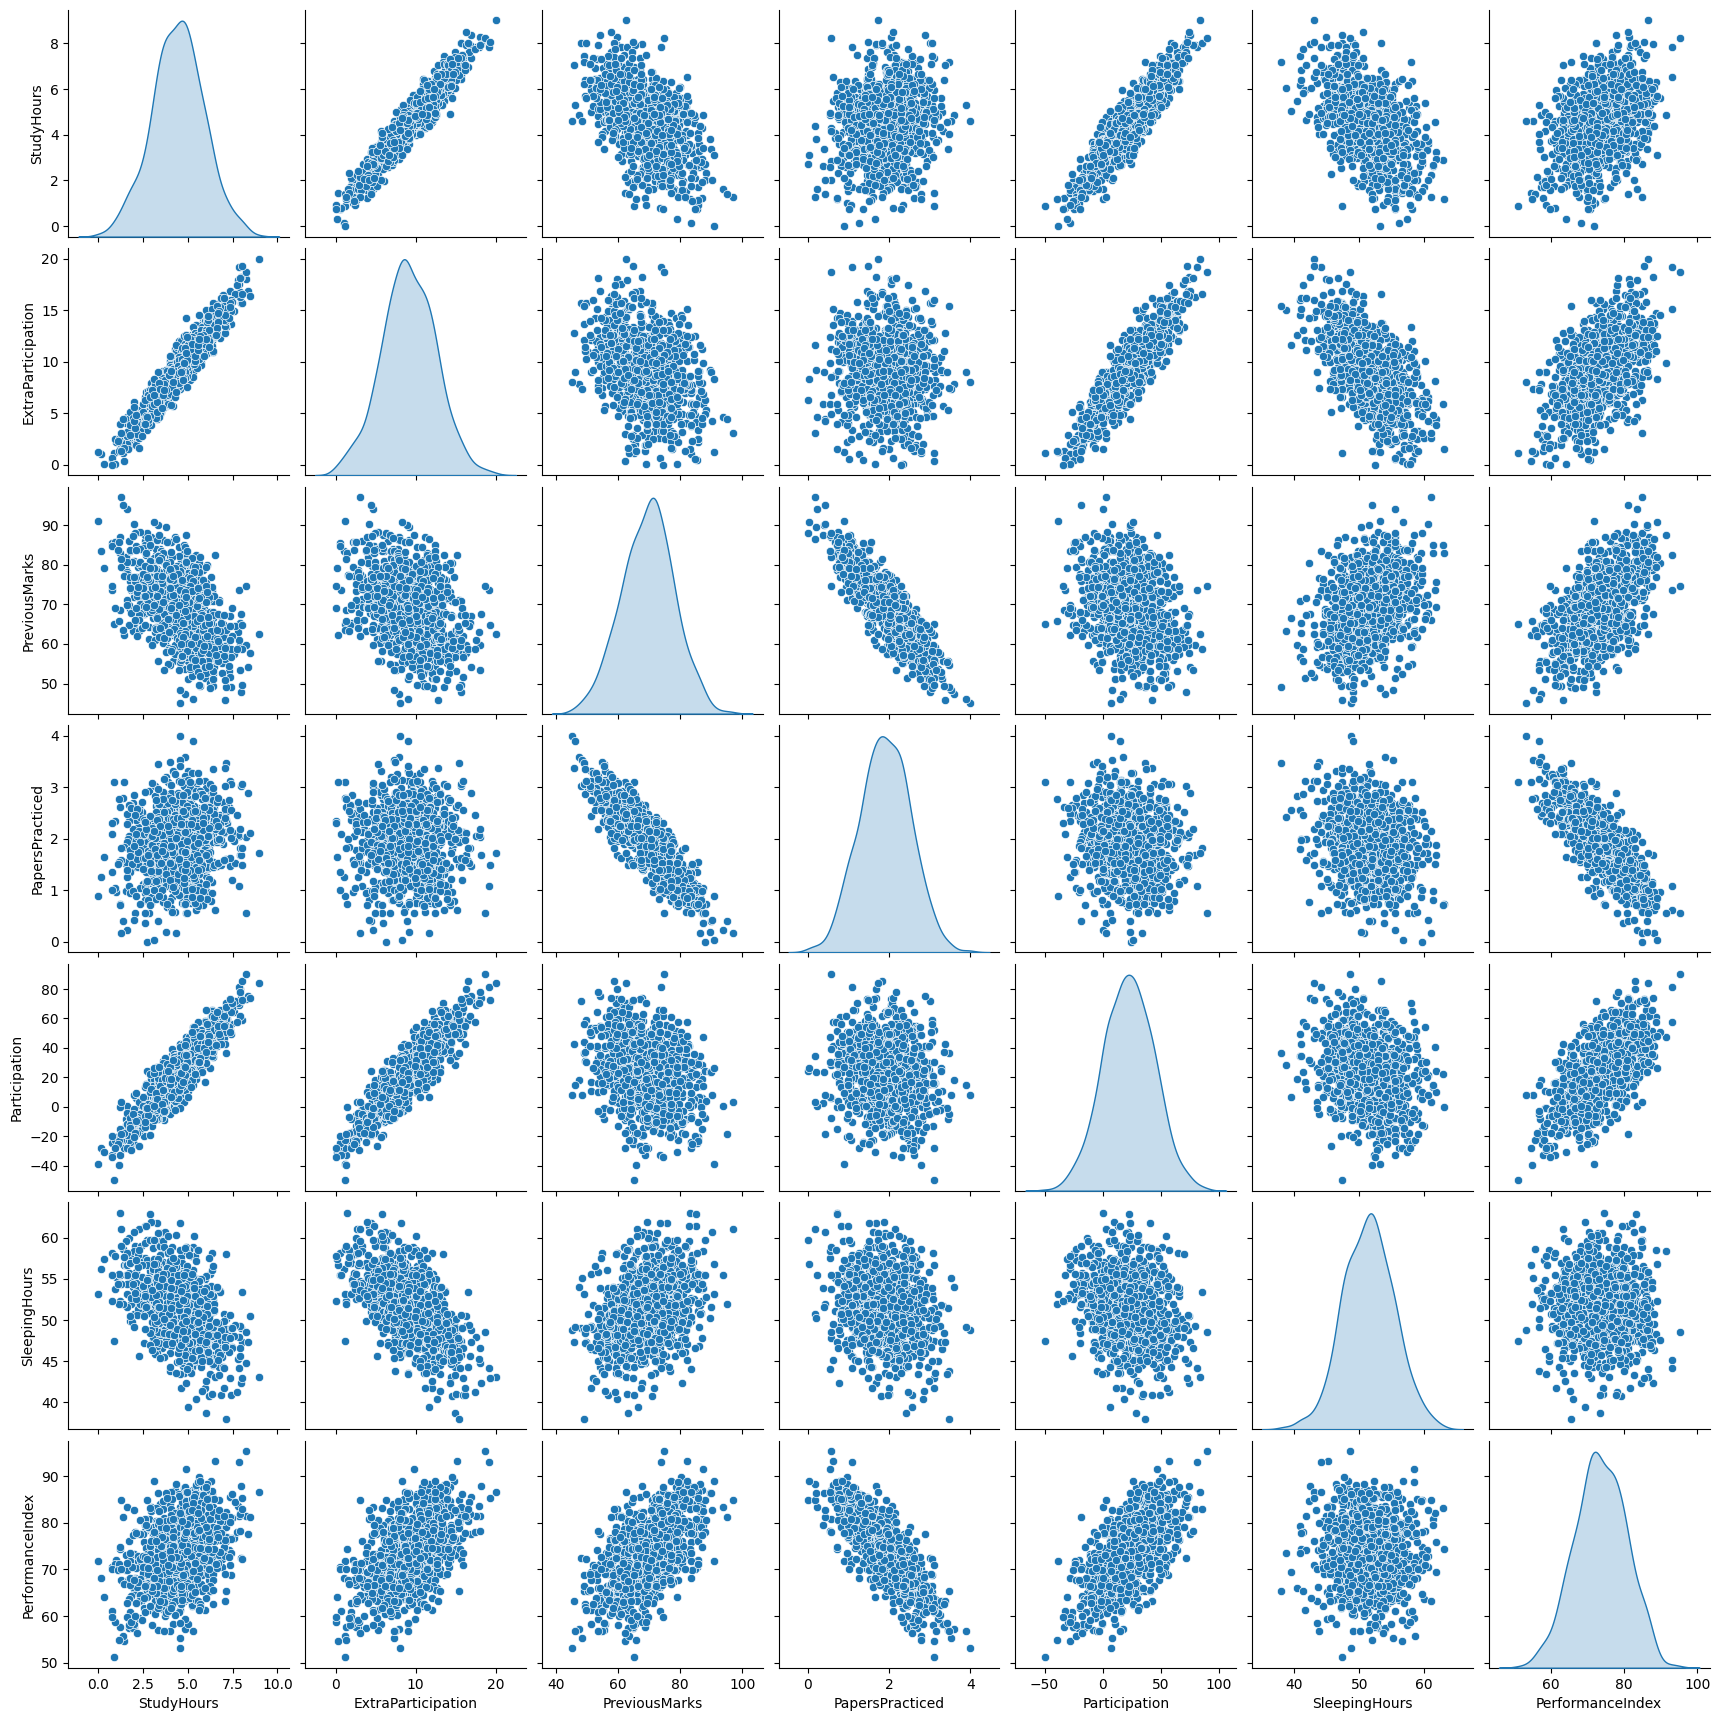

In [ ]:
df_num = df.select_dtypes(include=["int64", "float64"])

sns.pairplot(df_num, diag_kind="kde")
plt.show()

Según las gráficas, las variables más relacionadas a PerformanceIndex son: 
- PreviousMarks
- PapersPracticed
- Participation

In [12]:
xname = 'PreviousMarks'
#xname = 'PapersPracticed'
#xname = 'Participation'

yname = 'PerformanceIndex'
x = df[xname].values
y = df[yname].values
x_mean = np.mean(x)
y_mean = np.mean(y)
beta_1 = np.sum((x - x_mean) * (y - y_mean)) / np.sum((x - x_mean)**2)
beta_0 = y_mean - beta_1 * x_mean
print(f"beta0 = {beta_0:.4f}")
print(f"beta1 = {beta_1:.4f}")

beta0 = 40.2339
beta1 = 0.4790


In [17]:
# generar las predicciones para los valores de x donde están los puntos
y_pred = beta_0 + beta_1 * x

# graficar
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Datos'))
fig.add_trace(go.Scatter(x=x, y=beta_0 + beta_1 * x, mode='lines', name='Regresión lineal'))
# Líneas de error (verticales)
for xi, yi, ypi in zip(x, y, y_pred):
    fig.add_trace(go.Scatter(x=[xi, xi], y=[yi, ypi],mode="lines",line=dict(color="gray", width=1),showlegend=False))

fig.update_layout(title='Regresión lineal simple', xaxis_title=xname, yaxis_title=yname,width=900,height=600)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed